In [87]:
import nasdaqdatalink # pip install nasdaq-data-link
import yahoo_fin.stock_info as yf # pip install yahoo_fin
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
'''
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from statsmodels.graphics.tsaplots import plot_acf

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
'''
plt.rcParams.update({'figure.figsize': (10, 6), 'figure.dpi': 80}) # set fig size

## Data gathering and processing 

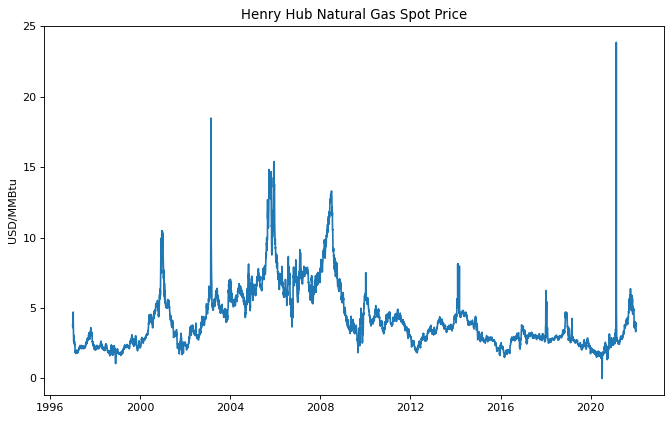

In [137]:
HH_spot_price_daily = nasdaqdatalink.get('EIA/NG_RNGWHHD_D', start_date='1997-01-07', end_date='2022-01-07')
plt.plot(HH_spot_price_daily)
plt.title('Henry Hub Natural Gas Spot Price')
plt.ylabel('USD/MMBtu')
plt.show()

In [180]:
def get_datasets(source, startdate='1997-01-01', enddate='2022-01-31', auth="Gymx-B5owcdhypB7ydu8"):
    try:
        return nasdaqdatalink.get(source, start_date=startdate, end_date=enddate, authtoken=auth)
    except:
        return yf.get_data(source, start_date=startdate, end_date=enddate, interval='1mo')['adjclose'].to_frame()

features = [
  'US_gas_consumption',
  'US_gas_supply',
  'US_storage_volume',
  'US_gas_exports',
  'US_gas_imports',
  'WTI_spot_price',
  #'TTF_spot_price',
  'gas_futures_1',
  'US_PMI',
  'dow_jones',
  '3m_T-bills',
  '5y_T-bills',
]

nasdaq_API_mapping = {
    'HH_spot_price':'EIA/NG_RNGWHHD_M',
    'US_gas_consumption':'EIA/STEO_NGTCPUS_M',
    'US_gas_supply':'EIA/STEO_NGPSUPP_M',
    'US_storage_volume':'EIA/NG_N5020US2_M',
    'US_gas_exports':'EIA/NG_N9130US2_M',
    'US_gas_imports':'EIA/NG_N9100US2_M',
    'gas_futures_1':'EIA/NG_RNGC1_M',
    'WTI_spot_price':'EIA/PET_RWTC_M',
    'US_PMI':'FRED/NAPM',
    'dow_jones':'^DJI',
    '3m_T-bills':'^IRX',
    '5y_T-bills':'^FVX'
}

In [181]:
df = pd.DataFrame() # contains all features indexed by date
for feature in features:
    data = get_datasets(nasdaq_API_mapping[feature])
    df = pd.concat([df, data], axis=1, join='outer')
df = df.set_axis(features, axis=1, copy=False) # rename the columns to match the features
df = df.resample('M').mean() # align monthly indices
df

,US_gas_consumption,US_gas_supply,US_storage_volume,US_gas_exports,US_gas_imports,WTI_spot_price,gas_futures_1,US_PMI,dow_jones,3m_T-bills,5y_T-bills
1997-01-31,81.946492,84.198499,1495563.0,12028.0,278288.0,25.13,3.067,53.8,6813.089844,5.010,6.250
1997-02-28,81.200033,74.303301,1139422.0,12443.0,240545.0,22.18,2.065,53.1,6877.740234,5.070,6.368
1997-03-31,69.557141,65.940162,990433.0,16276.0,256985.0,20.97,1.899,53.8,6583.479980,5.170,6.759
1997-04-30,61.401220,57.639494,1051235.0,13872.0,238178.0,19.70,2.005,53.7,7009.000000,5.100,6.565
1997-05-31,53.216020,49.180900,1364797.0,10097.0,241732.0,20.82,2.253,56.1,7331.000000,4.820,6.508
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,70.336595,70.231507,3304886.0,535660.0,220206.0,71.65,5.120,NaN,33843.921875,0.028,0.997
2021-10-31,72.180108,73.880276,3664591.0,545121.0,228203.0,81.48,5.580,NaN,35819.558594,0.048,1.188
2021-11-30,88.210309,91.001054,3531966.0,557080.0,242405.0,79.15,5.100,NaN,34483.718750,0.048,1.150
2021-12-31,96.319902,96.169584,NaN,NaN,NaN,71.71,3.860,NaN,36338.300781,0.033,1.263


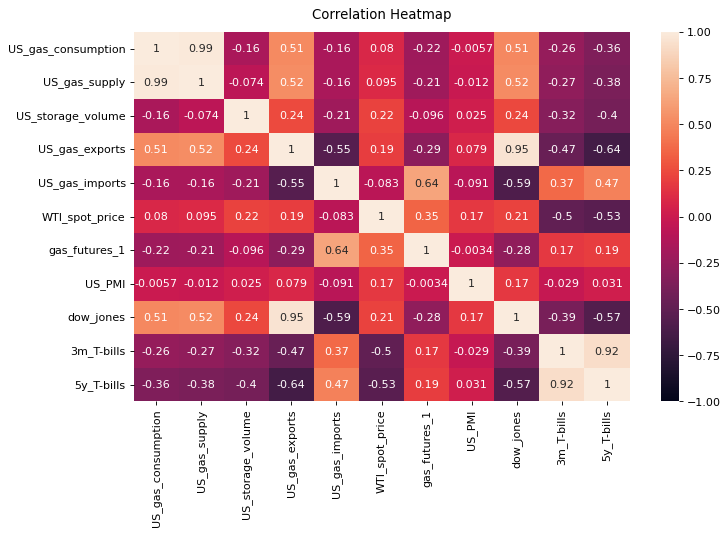

In [182]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

## APPENDIX

In [104]:
features_units_mapping = {
    'HH_spot_price':'USD/MMBtu',
    'US_gas_consumption':'bcf/day',
    'US_gas_supply':'bcf/day',
    'US_storage_volume':'MMcf',
    'US_gas_exports':'MMcf',
    'US_gas_imports':'MMcf',
    'gas_futures_1':'USD/MMBtu',
    'WTI_spot_price':'USD/barrel',
    'TTF_spot_price':'EUR/MWh',
}

## STUFF & TESTS

In [ ]:
# energy data (source: EIA)
US_gas_consumption = nasdaqdatalink.get("EIA/STEO_NGTCPUS_M", start_date='1997-01-07', end_date='2022-01-07') # unit: bcf/day
US_storage_volume = nasdaqdatalink.get('EIA/NG_N5020US2_M', start_date='1997-01-07', end_date='2022-01-07') # unit: MMcf
US_gas_exports = nasdaqdatalink.get("EIA/NG_N9130US2_M", start_date='1997-01-07', end_date='2022-01-07') # unit: MMcf
US_gas_imports = nasdaqdatalink.get("EIA/NG_N9100US2_M", start_date='1997-01-07', end_date='2022-01-07') # unit: MMcf
WTI_spot_price = nasdaqdatalink.get("EIA/PET_RWTC_M", start_date='1997-01-07', end_date='2022-01-07') # unit: USD/barrel
TTF_spot_price = yf.get_data('TTF=F', start_date='07/01/1997', end_date='01/07/2022')['adjclose'] # unit: EUR/MWh
# macroeconomic data (source: Federal Reserve)
US_PMI = nasdaqdatalink.get("FRED/NAPM", start_date='1997-01-07', end_date='2022-01-07')
fed_fund_effective_rate_data = nasdaqdatalink.get("FED/RIFSPFF_N_D", start_date='1997-01-07', end_date='2022-01-07')

In [116]:
def get_datasets(source, startdate='1997-01-07', enddate='2022-01-07', auth="Gymx-B5owcdhypB7ydu8"):
    try:
        return nasdaqdatalink.get(source, start_date=startdate, end_date=enddate, authtoken=auth)
    except:
        return yf.get_data(source, start_date=startdate, end_date=enddate, interval='1mo')['adjclose'].to_frame()
    
get_datasets('^DJI')

,adjclose
1997-02-01,6877.740234
1997-03-01,6583.479980
1997-04-01,7009.000000
1997-05-01,7331.000000
1997-06-01,7672.799805
...,...
2021-09-01,33843.921875
2021-10-01,35819.558594
2021-11-01,34483.718750
2021-12-01,36338.300781


In [147]:
nasdaqdatalink.get("FRED/M1109BUSM293NNBR", start_date='1997-01-07', end_date='2022-01-07')

,VALUE
DATE,


In [155]:
get_datasets('EUR=X')

,adjclose
2003-12-01,0.79428
2004-01-01,0.80308
2004-02-01,0.79808
2004-03-01,0.81215
2004-03-31,0.83452
...,...
2021-08-31,0.86195
2021-09-30,0.86495
2021-11-01,0.88547
2021-12-01,0.88300
